In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels

import pickle
import graphviz
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('fivethirtyeight')

%matplotlib inline
from tqdm import tqdm
# modelling imports
from xgboost import XGBClassifier
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# from dask_cuda import LocalCUDACluster
# from dask.distributed import Client


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
selected_columns = pickle.load( open("/home/nick/Documents/data/select_cols.p", "rb"))

In [3]:
tw = selected_columns.sample(10000)
ttw = selected_columns.sample(1000)
tttw = selected_columns.sample(50)
ttw

,UHRSWORK,OCC,DEGFIELDD,EDUC,WKSWORK2,VALUEH,OWNCOST,DEGFIELD,EDUCD,AGE,BIRTHYR,PWPUMA00,PROPTX99,TRANTIME,MORTAMT1,DENSITY,SLWT,PROPINSR,YRMARR,ARRIVES,METPOP10,IND,PUMA,HIUID,COSTELEC,PWTYPE,SEX,ANCESTR1,ROOMS,BPLD,BPL,RELATED,COSTWATR,STATEICP,RELATE,ANCESTR1D,MET2013,STATEFIP,PWCOUNTY,BUILTYR2,COUNTYFIP,MOVEDIN,COSTGAS,DEPARTS,COUNTYICP,TRANWORK,EMPSTAT,CLASSWKRD,WRKLSTWK,PWMET13,REGION,EMPSTATD,WORKEDYR,CBPERNUM,PWMET13ERR,YNGCH,BEDROOMS,>50K
3091403,30.0,4020.0,0.0,6.0,4.0,80000.0,822.0,0.0,65.0,38.0,1980.0,10500.0,22.0,15.0,650.0,3248.8,37.0,1000.0,2011.0,619.0,527753.0,4971.0,10502.0,135681301.0,1200.0,5.0,2.0,720.0,6.0,51500.0,515.0,201.0,860.0,73.0,2.0,7200.0,44060.0,53.0,63.0,1.0,63.0,0.0,9992.0,602.0,630.0,31.0,1.0,22.0,2.0,44060.0,42.0,10.0,3.0,2.0,5.0,15.0,4.0,0.0
2616990,0.0,4110.0,0.0,6.0,0.0,120000.0,433.0,0.0,63.0,52.0,1966.0,0.0,13.0,0.0,140.0,163.8,136.0,790.0,2012.0,0.0,78433.0,8680.0,700.0,115697101.0,1440.0,0.0,2.0,935.0,6.0,3300.0,33.0,201.0,210.0,54.0,2.0,9350.0,0.0,47.0,0.0,6.0,0.0,0.0,9993.0,0.0,0.0,0.0,3.0,22.0,1.0,0.0,32.0,30.0,2.0,2.0,0.0,99.0,4.0,0.0
1217489,40.0,5530.0,0.0,6.0,6.0,250000.0,622.0,0.0,63.0,49.0,1969.0,700.0,42.0,10.0,0.0,1224.3,180.0,3000.0,1995.0,644.0,110826.0,670.0,700.0,52645301.0,840.0,5.0,2.0,32.0,6.0,2000.0,20.0,201.0,50.0,32.0,2.0,321.0,29940.0,20.0,45.0,7.0,45.0,0.0,120.0,632.0,450.0,10.0,1.0,28.0,2.0,29940.0,22.0,10.0,3.0,2.0,1.0,99.0,5.0,0.0
2316214,60.0,2100.0,1902.0,11.0,6.0,380000.0,2563.0,19.0,115.0,52.0,1966.0,900.0,65.0,20.0,2100.0,2364.2,158.0,2000.0,2006.0,824.0,2077240.0,7270.0,910.0,101844601.0,2520.0,5.0,1.0,32.0,9.0,3900.0,39.0,201.0,550.0,24.0,2.0,321.0,17460.0,39.0,35.0,7.0,35.0,0.0,480.0,802.0,350.0,10.0,1.0,14.0,2.0,17460.0,21.0,10.0,3.0,2.0,1.0,9.0,4.0,1.0
2029926,40.0,5740.0,0.0,6.0,6.0,80000.0,561.0,0.0,63.0,62.0,1956.0,900.0,27.0,20.0,0.0,586.7,115.0,600.0,0.0,754.0,1079671.0,9370.0,905.0,89000601.0,840.0,5.0,2.0,50.0,6.0,3600.0,36.0,101.0,140.0,13.0,1.0,500.0,40380.0,36.0,55.0,5.0,55.0,6.0,960.0,732.0,550.0,10.0,1.0,28.0,2.0,40380.0,12.0,10.0,3.0,1.0,6.0,99.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923447,0.0,0.0,0.0,6.0,0.0,67000.0,450.0,0.0,63.0,23.0,1995.0,0.0,1.0,0.0,0.0,89.6,100.0,1.0,2017.0,0.0,5920416.0,0.0,4400.0,128489009.0,4200.0,0.0,2.0,599.0,7.0,4800.0,48.0,401.0,1200.0,49.0,4.0,5990.0,26420.0,48.0,0.0,5.0,0.0,0.0,9993.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,33.0,30.0,1.0,9.0,0.0,99.0,4.0,0.0
3184547,0.0,0.0,0.0,8.0,0.0,175000.0,555.0,0.0,81.0,76.0,1942.0,0.0,44.0,0.0,0.0,55.2,27.0,650.0,1967.0,0.0,45820.0,0.0,55101.0,139805701.0,1560.0,0.0,2.0,32.0,6.0,1700.0,17.0,101.0,9993.0,25.0,1.0,321.0,0.0,55.0,0.0,5.0,0.0,7.0,1200.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,21.0,30.0,1.0,1.0,0.0,99.0,3.0,0.0
1945991,36.0,3630.0,6001.0,10.0,4.0,250000.0,1075.0,60.0,101.0,29.0,1989.0,2900.0,68.0,60.0,0.0,527.8,96.0,2200.0,0.0,744.0,182493.0,8590.0,2702.0,85613803.0,1200.0,4.0,2.0,50.0,7.0,3600.0,36.0,301.0,9993.0,13.0,3.0,500.0,0.0,36.0,71.0,5.0,0.0,0.0,9993.0,642.0,0.0,10.0,1.0,22.0,2.0,35620.0,12.0,10.0,3.0,3.0,2.0,99.0,4.0,0.0
2326391,40.0,4810.0,0.0,7.0,6.0,120000.0,501.0,0.0,71.0,47.0,1971.0,900.0,23.0,40.0,0.0,1407.9,166.0,2000.0,0.0,659.0,1252987.0,6991.0,900.0,102397402.0,2160.0,5.0,2.0,999.0,8.0,4000.0,40.0,301.0,9993.0,53.0,3.0,9990.0,36420.0,40.0,27.0,4.0,27.0,0.0,9993.0,617.0,270.0,10.0,1.0,22.0,3.0,36420.0,33.0,10.0,3.0,2.0,5.0,99.0,4.0,1.0


In [4]:
X = selected_columns.drop(columns=['>50K'])
y = selected_columns.filter(['>50K'])

In [5]:
Xs = tw.drop(columns=['>50K'])
ys = tw.filter(['>50K'])

In [6]:
features = list(X.columns)
features

['UHRSWORK',
 'OCC',
 'DEGFIELDD',
 'EDUC',
 'WKSWORK2',
 'VALUEH',
 'OWNCOST',
 'DEGFIELD',
 'EDUCD',
 'AGE',
 'BIRTHYR',
 'PWPUMA00',
 'PROPTX99',
 'TRANTIME',
 'MORTAMT1',
 'DENSITY',
 'SLWT',
 'PROPINSR',
 'YRMARR',
 'ARRIVES',
 'METPOP10',
 'IND',
 'PUMA',
 'HIUID',
 'COSTELEC',
 'PWTYPE',
 'SEX',
 'ANCESTR1',
 'ROOMS',
 'BPLD',
 'BPL',
 'RELATED',
 'COSTWATR',
 'STATEICP',
 'RELATE',
 'ANCESTR1D',
 'MET2013',
 'STATEFIP',
 'PWCOUNTY',
 'BUILTYR2',
 'COUNTYFIP',
 'MOVEDIN',
 'COSTGAS',
 'DEPARTS',
 'COUNTYICP',
 'TRANWORK',
 'EMPSTAT',
 'CLASSWKRD',
 'WRKLSTWK',
 'PWMET13',
 'REGION',
 'EMPSTATD',
 'WORKEDYR',
 'CBPERNUM',
 'PWMET13ERR',
 'YNGCH',
 'BEDROOMS']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

In [8]:
train_df = X_train.copy()
train_df['$$$'] = y_train

train_df

,UHRSWORK,OCC,DEGFIELDD,EDUC,WKSWORK2,VALUEH,OWNCOST,DEGFIELD,EDUCD,AGE,BIRTHYR,PWPUMA00,PROPTX99,TRANTIME,MORTAMT1,DENSITY,SLWT,PROPINSR,YRMARR,ARRIVES,METPOP10,IND,PUMA,HIUID,COSTELEC,PWTYPE,SEX,ANCESTR1,ROOMS,BPLD,BPL,RELATED,COSTWATR,STATEICP,RELATE,ANCESTR1D,MET2013,STATEFIP,PWCOUNTY,BUILTYR2,COUNTYFIP,MOVEDIN,COSTGAS,DEPARTS,COUNTYICP,TRANWORK,EMPSTAT,CLASSWKRD,WRKLSTWK,PWMET13,REGION,EMPSTATD,WORKEDYR,CBPERNUM,PWMET13ERR,YNGCH,BEDROOMS,$$$
1971391,0.0,0.0,0.0,4.0,0.0,80000.0,228.0,0.0,40.0,16.0,2002.0,0.0,22.0,0.0,0.0,88.8,22.0,1.0,0.0,0.0,72215.0,0.0,2402.0,86637202.0,1680.0,0.0,1.0,924.0,7.0,3600.0,36.0,901.0,9993.0,13.0,9.0,9241.0,0.0,36.0,0.0,5.0,0.0,0.0,9993.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,12.0,30.0,1.0,3.0,0.0,99.0,6.0,0.0
2804169,45.0,7220.0,0.0,6.0,6.0,100000.0,1148.0,0.0,63.0,56.0,1962.0,3800.0,32.0,90.0,850.0,69.6,46.0,1300.0,2002.0,734.0,39020.0,4270.0,3700.0,123825501.0,2880.0,5.0,1.0,50.0,8.0,4800.0,48.0,101.0,700.0,49.0,1.0,500.0,0.0,48.0,309.0,13.0,0.0,3.0,9993.0,602.0,0.0,10.0,1.0,22.0,2.0,47380.0,33.0,10.0,3.0,1.0,5.0,31.0,5.0,1.0
62430,0.0,0.0,2399.0,11.0,0.0,2387000.0,1087.0,23.0,114.0,78.0,1940.0,0.0,65.0,0.0,0.0,178.6,19.0,1900.0,1962.0,0.0,211033.0,0.0,500.0,3003101.0,1560.0,0.0,2.0,187.0,7.0,4800.0,48.0,201.0,9993.0,61.0,2.0,1870.0,39140.0,4.0,0.0,11.0,25.0,0.0,2880.0,0.0,250.0,0.0,3.0,0.0,1.0,0.0,41.0,30.0,1.0,2.0,0.0,99.0,4.0,1.0
1226121,40.0,5240.0,0.0,6.0,6.0,1100.0,698.0,0.0,64.0,55.0,1963.0,500.0,54.0,25.0,0.0,2120.1,95.0,1.0,1981.0,659.0,2009342.0,8191.0,500.0,53010701.0,3360.0,5.0,2.0,82.0,6.0,2700.0,27.0,101.0,280.0,32.0,1.0,820.0,28140.0,20.0,209.0,4.0,209.0,4.0,480.0,632.0,2090.0,10.0,1.0,23.0,2.0,28140.0,22.0,10.0,3.0,1.0,5.0,99.0,4.0,0.0
2131220,0.0,0.0,2311.0,10.0,0.0,370000.0,561.0,23.0,101.0,71.0,1947.0,0.0,27.0,0.0,0.0,195.7,74.0,2300.0,1971.0,0.0,694697.0,0.0,300.0,93531401.0,2400.0,0.0,2.0,26.0,10.0,3700.0,37.0,201.0,9993.0,47.0,2.0,261.0,24660.0,37.0,0.0,6.0,0.0,0.0,480.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,31.0,30.0,1.0,2.0,0.0,99.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503575,40.0,7040.0,0.0,6.0,6.0,420000.0,2672.0,0.0,65.0,47.0,1971.0,1300.0,65.0,50.0,2100.0,3322.5,186.0,1700.0,1996.0,654.0,4335391.0,9590.0,1308.0,20891601.0,4320.0,5.0,1.0,999.0,8.0,21030.0,210.0,201.0,1100.0,71.0,2.0,9990.0,41860.0,6.0,13.0,9.0,13.0,0.0,9992.0,602.0,130.0,10.0,1.0,25.0,3.0,41860.0,42.0,10.0,3.0,2.0,1.0,10.0,5.0,1.0
2496478,0.0,0.0,0.0,8.0,0.0,570000.0,1225.0,0.0,81.0,81.0,1937.0,0.0,68.0,0.0,0.0,1786.3,370.0,950.0,1978.0,0.0,5965343.0,0.0,3402.0,110126301.0,3600.0,0.0,1.0,50.0,9.0,4200.0,42.0,201.0,650.0,14.0,2.0,500.0,37980.0,42.0,0.0,6.0,29.0,0.0,9992.0,0.0,290.0,0.0,3.0,0.0,1.0,0.0,12.0,30.0,1.0,2.0,0.0,99.0,5.0,0.0
256691,35.0,2710.0,5200.0,11.0,6.0,700000.0,232.0,52.0,116.0,57.0,1961.0,700.0,16.0,30.0,0.0,850.8,300.0,680.0,1979.0,734.0,166892.0,8564.0,10100.0,11738201.0,600.0,5.0,2.0,210.0,4.0,20000.0,200.0,101.0,780.0,71.0,1.0,2101.0,49700.0,6.0,7.0,3.0,0.0,5.0,9992.0,702.0,0.0,10.0,1.0,22.0,2.0,17020.0,42.0,10.0,3.0,1.0,1.0,99.0,3.0,1.0
1212783,0.0,0.0,0.0,6.0,0.0,330000.0,842.0,0.0,65.0,82.0,1936.0,0.0,63.0,0.0,0.0,1774.6,52.0,1500.0,1963.0,0.0,2009342.0,0.0,601.0,52447501.0,2040.0,0.0,1.0,22.0,11.0,2900.0,29.0,101.0,350.0,32.0,1.0,220.0,28140.0,20.0,0.0,6.0,91.0,4.0,960.0,0.0,910.0,0.0,3.0,0.0,1.0,0.0,22.0,30.0,1.0,1.0,0.0,99.0,6.0,1.0


In [9]:
# std_scale = StandardScaler()
# X_train_scaled = std_scale.fit_transform(X_train)

In [10]:
rf = RandomForestClassifier()
rf.fit(Xs_train, ys_train)


<ipython-input-10-9806e88f6ceb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(Xs_train, ys_train)


RandomForestClassifier()

## Class imbalance? 

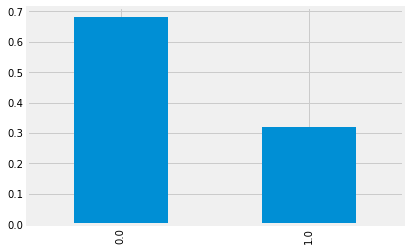

In [11]:
classes = tw['>50K'].value_counts(normalize=True)

classes.plot(kind='bar')

In [12]:
f1_scores = []
precision_scores = []
recall_scores = []

lr = LogisticRegression(solver='newton-cg')
tqdm(lr.fit(Xs_train, ys_train))
f1_scores.append(f1_score(lr.predict(Xs_test), ys_test))
precision_scores.append(precision_score(lr.predict(Xs_test), ys_test))
recall_scores.append(recall_score(lr.predict(Xs_test), ys_test))

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nick/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/nick/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
0it [00:00, ?it/s]


In [21]:
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
f1_scores = []
precision_scores = []
recall_scores = []
r2 = []
x = 1

for solver in solvers:
    print(f'Round {x}')
    lr = LogisticRegression(solver=solver, n_jobs=-1)
    lr.fit(Xs_train, ys_train)
    r2.append(lr.score(Xs_train, ys_train))
    f1_scores.append(f1_score(lr.predict(Xs_test), ys_test))
    precision_scores.append(precision_score(lr.predict(Xs_test), ys_test))
    recall_scores.append(recall_score(lr.predict(Xs_test), ys_test))
    x += 1
    
result = zip(solvers, f1_scores, precision_scores, recall_scores, r2)
for line in result:
    print(line)

Round 1
Round 2


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Round 3


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Round 4


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Round 5
('liblinear', 0.47552447552447547, 0.3814102564102564, 0.6312997347480106, 0.72625)
('newton-cg', 0.6462346760070052, 0.5913461538461539, 0.7123552123552124, 0.800875)
('lbfgs', 0.41841841841841837, 0.3349358974358974, 0.5573333333333333, 0.70325)
('sag', 0.16601815823605706, 0.10256410256410256, 0.43537414965986393, 0.667)
('saga', 0.16601815823605706, 0.10256410256410256, 0.43537414965986393, 0.666625)


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


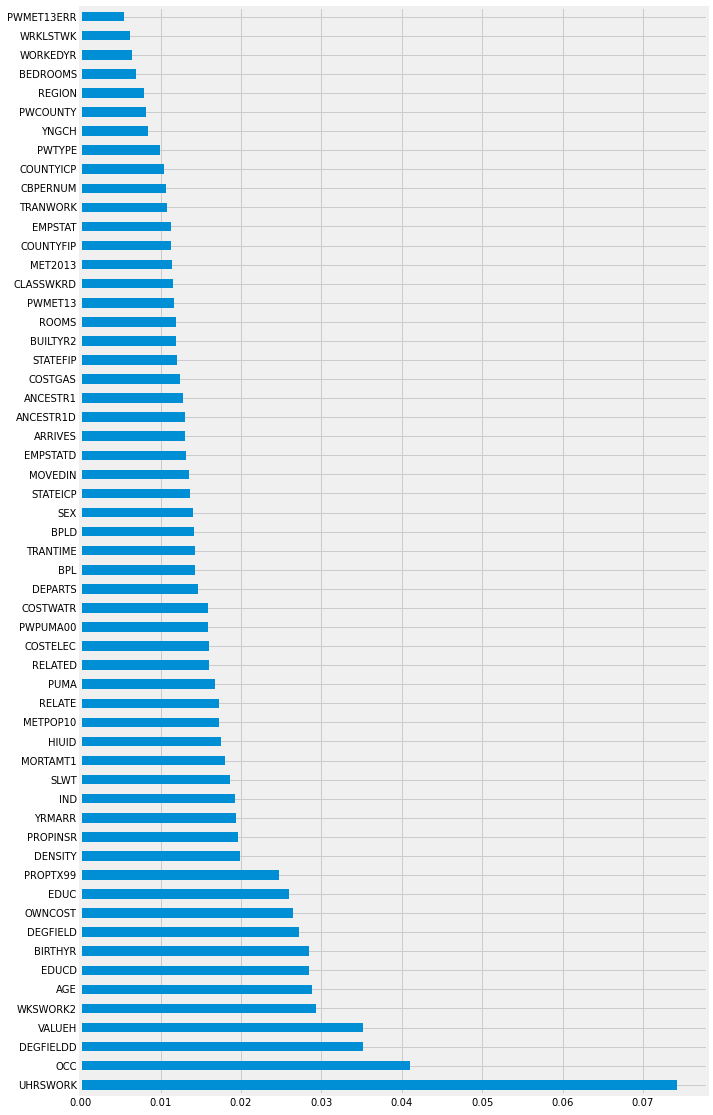

In [14]:
plt.figure(figsize=[10, 20])
importance = pd.Series(rf.feature_importances_, index=features)
importance.nlargest(len(features)).plot(kind='barh')

In [15]:
dt = DecisionTreeClassifier(min_samples_split=2, random_state=69)
dt.fit(Xs_train, ys_train)

DecisionTreeClassifier(random_state=69)

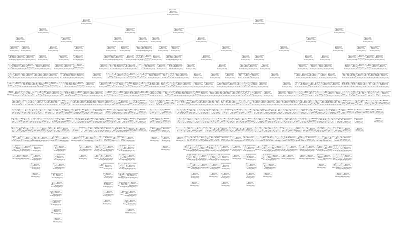

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xs_train, ys_train)
tree.plot_tree(clf)

dot_data = tree.export_graphviz(clf, feature_names=features,
                    filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [17]:
# decision_tree = DecisionTreeClassifier()
# decision_tree = decision_tree.fit(X, y)
# r = export_text(decision_tree, feature_names=features)
# r

In [18]:
classifier = svm.LinearSVC()
classifier.fit(X_train_scaled, y_train)
y_score = classifier.decision_function(X_test)

NameError: name 'X_train_scaled' is not defined

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.10f}'.format(average_precision))

In [ ]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
lm.score(X_train_scaled, y_train)

In [ ]:
sns.pairplot(ttw, hue='>50K', diag_kws={'bw':0.5})

In [ ]:
sns.lmplot(x='EDUC', y='UHRSWORK', data=ttw)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
model

In [ ]:
params = {'colsample_bynode': 0.8,
         'learning_rate': 1,
         'max_depth': 5,
         'num_parallel_tree': 100,
         'objective': 'binary:logistic',
         'subsample': 0.8,
         'tree_method': 'gpu_hist'}

# bst = train(params, tw, num_boost_round=1)

In [ ]:
sns.countplot(tw['>50K'])

In [ ]:
corr = tw.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


plt.figure(figsize=[20, 20])
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
compression_opts = dict(method='zip', archive_name='usa.csv')
tw.to_csv('usa.zip', index=False, compression=compression_opts)

In [ ]:
sns.pairplot(tw, hue='>50K', diag_kws={'bw':0.5})